In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#TASK1

In [2]:
df = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.shape

(300698, 53)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [5]:
df.describe()

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Garage Lot Name,Latitude,Longitude
count,3.006980e+05,298083.000000,2.971580e+05,297158.000000,0.0,0.0,0.0,0.0,0.0,297158.000000,297158.000000
mean,3.130054e+07,10848.888645,1.004854e+06,203754.534416,NaN,NaN,NaN,NaN,NaN,40.725885,-73.925630
std,5.738547e+05,583.182081,2.175338e+04,29880.183529,NaN,NaN,NaN,NaN,NaN,0.082012,0.078454
min,3.027948e+07,83.000000,9.133570e+05,121219.000000,NaN,NaN,NaN,NaN,NaN,40.499135,-74.254937
25%,3.080118e+07,10310.000000,9.919752e+05,183343.000000,NaN,NaN,NaN,NaN,NaN,40.669796,-73.972142
50%,3.130436e+07,11208.000000,1.003158e+06,201110.500000,NaN,NaN,NaN,NaN,NaN,40.718661,-73.931781
75%,3.178446e+07,11238.000000,1.018372e+06,224125.250000,NaN,NaN,NaN,NaN,NaN,40.781840,-73.876805
max,3.231065e+07,11697.000000,1.067173e+06,271876.000000,NaN,NaN,NaN,NaN,NaN,40.912869,-73.700760


In [6]:
df.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2164
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board                        0
Borough         

In [7]:
for column in df.columns:
    if df[column].isnull().sum()>250000:
        df.drop([column],axis=1,inplace=True)

In [8]:
df.shape

(300698, 39)

In [9]:
df.dropna(inplace=True)

In [10]:
df.shape

(245664, 39)

In [11]:
df.isnull().sum()

Unique Key                        0
Created Date                      0
Closed Date                       0
Agency                            0
Agency Name                       0
Complaint Type                    0
Descriptor                        0
Location Type                     0
Incident Zip                      0
Incident Address                  0
Street Name                       0
Cross Street 1                    0
Cross Street 2                    0
Address Type                      0
City                              0
Facility Type                     0
Status                            0
Due Date                          0
Resolution Description            0
Resolution Action Updated Date    0
Community Board                   0
Borough                           0
X Coordinate (State Plane)        0
Y Coordinate (State Plane)        0
Park Facility Name                0
Park Borough                      0
School Name                       0
School Number               

In [12]:
df.duplicated().value_counts()

False    245664
dtype: int64

In [ ]:
#TASK2

In [13]:
df['Created Date'] = pd.to_datetime(df['Created Date'])
df['Closed Date'] = pd.to_datetime(df['Closed Date'])

In [14]:
df.dtypes

Unique Key                                 int64
Created Date                      datetime64[ns]
Closed Date                       datetime64[ns]
Agency                                    object
Agency Name                               object
Complaint Type                            object
Descriptor                                object
Location Type                             object
Incident Zip                             float64
Incident Address                          object
Street Name                               object
Cross Street 1                            object
Cross Street 2                            object
Address Type                              object
City                                      object
Facility Type                             object
Status                                    object
Due Date                                  object
Resolution Description                    object
Resolution Action Updated Date            object
Community Board     

In [15]:
df['Request_Closing_Time'] = df['Closed Date']-df['Created Date']

In [16]:
df.dtypes

Unique Key                                  int64
Created Date                       datetime64[ns]
Closed Date                        datetime64[ns]
Agency                                     object
Agency Name                                object
Complaint Type                             object
Descriptor                                 object
Location Type                              object
Incident Zip                              float64
Incident Address                           object
Street Name                                object
Cross Street 1                             object
Cross Street 2                             object
Address Type                               object
City                                       object
Facility Type                              object
Status                                     object
Due Date                                   object
Resolution Description                     object
Resolution Action Updated Date             object


In [ ]:
#TASK3

In [17]:
df['Community Board'].value_counts().head(10)

12 MANHATTAN    10576
01 BROOKLYN      8676
05 QUEENS        7879
01 QUEENS        7828
09 QUEENS        7169
18 BROOKLYN      6671
12 BROOKLYN      6429
07 QUEENS        6370
03 BROOKLYN      6016
11 BROOKLYN      5735
Name: Community Board, dtype: int64

In [18]:
df['Borough'].value_counts()

BROOKLYN         84197
QUEENS           68237
MANHATTAN        48429
BRONX            34518
STATEN ISLAND    10283
Name: Borough, dtype: int64

<AxesSubplot:>

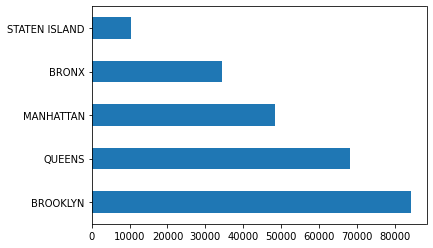

In [19]:
df['Borough'].value_counts().plot(kind='barh')

In [20]:
df['City'].value_counts().head(10)

BROOKLYN         84197
NEW YORK         48429
BRONX            34518
STATEN ISLAND    10283
JAMAICA           5706
ASTORIA           5517
FLUSHING          5170
RIDGEWOOD         4373
CORONA            3918
WOODSIDE          2973
Name: City, dtype: int64

In [21]:
df['Descriptor'].value_counts().head(10)

No Access                        55656
Loud Music/Party                 48829
Partial Access                   19635
Loud Talking                     17671
Posted Parking Sign Violation    17231
Blocked Hydrant                  14505
With License Plate               14477
Commercial Overnight Parking      9541
Blocked Sidewalk                  9132
Car/Truck Music                   8442
Name: Descriptor, dtype: int64

In [22]:
df['Complaint Type'].value_counts()

Blocked Driveway            75291
Illegal Parking             60145
Noise - Street/Sidewalk     38033
Noise - Commercial          32020
Derelict Vehicle            14477
Noise - Vehicle             12122
Animal Abuse                 6573
Vending                      2211
Noise - Park                 1270
Drinking                     1007
Traffic                       918
Noise - House of Worship      696
Posting Advertisement         621
Disorderly Youth              185
Graffiti                       95
Name: Complaint Type, dtype: int64

<AxesSubplot:>

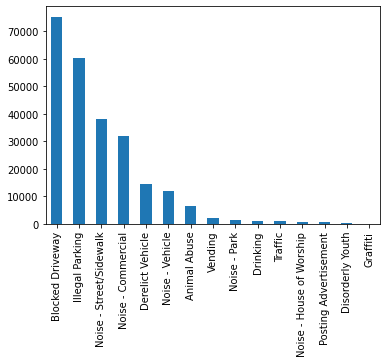

In [26]:
df['Complaint Type'].value_counts().plot(kind='bar')

In [31]:
df['Request_Closing_Time'] = df['Request_Closing_Time'].astype('timedelta64[s]')

In [32]:
df['Request_Closing_Time']

0          3315.0
1          5176.0
2         17491.0
3         27914.0
4         12422.0
           ...   
300692     2309.0
300694     7231.0
300695    11237.0
300696    14733.0
300697    14929.0
Name: Request_Closing_Time, Length: 245664, dtype: float64

In [ ]:
#TASK4

In [33]:
grouped = df.groupby(['Location Type','Complaint Type']).mean()
grouped.head(5)

Unique Key  Incident Zip  \
Location Type       Complaint Type                                   
Club/Bar/Restaurant Drinking            3.130877e+07  10753.664557   
                    Noise - Commercial  3.130618e+07  10667.385033   
Commercial          Animal Abuse        3.153133e+07  10362.310345   
Highway             Derelict Vehicle    3.131128e+07  10236.500000   
House and Store     Animal Abuse        3.136862e+07  11027.061728   

                                        X Coordinate (State Plane)  \
Location Type       Complaint Type                                   
Club/Bar/Restaurant Drinking                          1.004922e+06   
                    Noise - Commercial                9.993469e+05   
Commercial          Animal Abuse                      1.001490e+06   
Highway             Derelict Vehicle                  1.002373e+06   
House and Store     Animal Abuse                      1.011212e+06   

                                        Y Coordinate (State Plane)   Latitude  \
Location Type       Complaint Type                                              
Club/Bar/Restaurant Drinking                         205100.670886  40.729576   
                    Noise - Commercial               206492.532710  40.733421   
Commercial          Animal Abuse                     215999.931034  40.759513   
Highway             Derelict Vehicle                 230754.000000  40.800018   
House and Store     Animal Abuse                     193236.703704  40.696980   

                                        Longitude  Request_Closing_Time  
Location Type       Complaint Type                                       
Club/Bar/Restaurant Drinking           -73.925384          15942.683544  
                    Noise - Commercial -73.945510          11047.840790  
Commercial          Animal Abuse       -73.937776          14429.344828  
Highway             Derelict Vehicle   -73.934512           4616.500000  
House and Store     Animal Abuse       -73.902710          18747.876543

In [34]:
grouped.iloc[:,-1]

Location Type               Complaint Type          
Club/Bar/Restaurant         Drinking                    15942.683544
                            Noise - Commercial          11047.840790
Commercial                  Animal Abuse                14429.344828
Highway                     Derelict Vehicle             4616.500000
House and Store             Animal Abuse                18747.876543
House of Worship            Noise - House of Worship    11893.221264
Park/Playground             Animal Abuse                10423.375000
                            Drinking                    12676.105263
                            Noise - Park                12597.240157
                            Vending                     12589.619048
Parking Lot                 Animal Abuse                22317.453125
                            Posting Advertisement        7616.714286
Residential Building        Animal Abuse                17656.799020
Residential Building/House  Animal Abuse          

#TASK5
Ho: Complaint Type and Location is not related
Ha: Complaint Type and Location is related
alpha = 0.05

In [66]:
contingency_table = pd.crosstab(df['Complaint Type'],df['Location Type'])

In [67]:
contingency_table

Location Type,Club/Bar/Restaurant,Commercial,Highway,House and Store,House of Worship,Park/Playground,Parking Lot,Residential Building,Residential Building/House,Roadway Tunnel,Store/Commercial,Street/Sidewalk,Subway Station,Vacant Lot
Complaint Type,,,,,,,,,,,,,,
Animal Abuse,0,29,0,81,0,24,64,204,4840,0,416,911,4,0
Blocked Driveway,0,0,0,0,0,0,0,0,0,0,0,75291,0,0
Derelict Vehicle,0,0,2,0,0,0,0,0,0,4,0,14414,0,57
Disorderly Youth,0,0,0,0,0,0,0,0,68,0,7,110,0,0
Drinking,316,0,0,0,0,19,0,0,274,0,71,327,0,0
Graffiti,0,0,0,0,0,0,0,0,54,0,29,12,0,0
Illegal Parking,0,0,0,0,0,0,0,0,0,0,0,60145,0,0
Noise - Commercial,15087,0,0,0,0,0,0,0,0,0,16933,0,0,0
Noise - House of Worship,0,0,0,0,696,0,0,0,0,0,0,0,0,0


In [68]:
Observed_Values = contingency_table.values 

In [70]:
from scipy import stats

In [78]:
b =stats.chi2_contingency(contingency_table)

In [72]:
Expected_Values = b[3]

In [73]:
from scipy.stats import chi2

In [74]:
p_value=1-chi2.cdf(x=b[0],df=1)

In [79]:
p_value

0.0

p_value is less than 0.05 so we reject the null hypothesis that Complaint Type and Location Type is not related. 